# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [95]:
df = pd.read_csv('../data/am_pm.csv')
df.head()

,timestamp,am,pm,target,predict
0,2020-04-17,21,2,working_day,weekend
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day


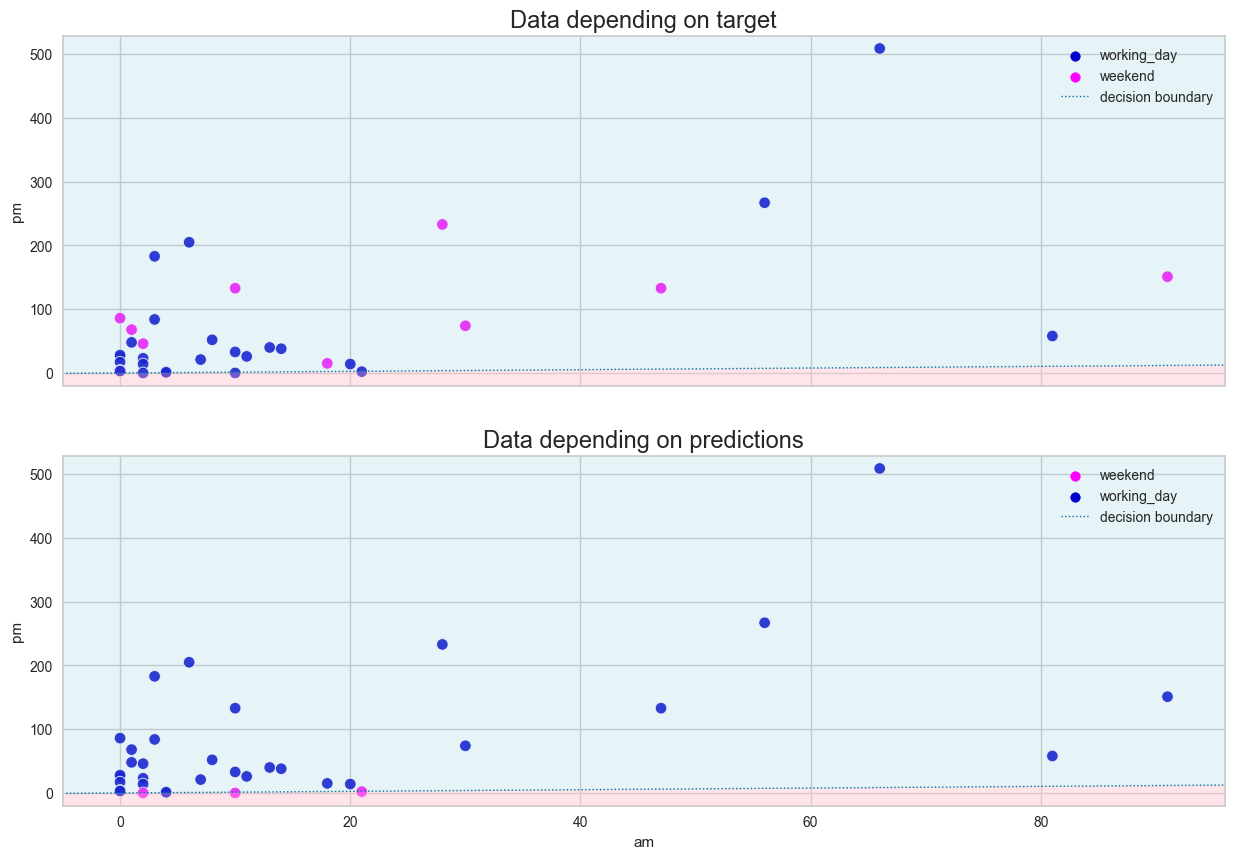

In [96]:
# Drawing a plot #1 (color depends on the target)
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 10), sharex=True)

am_pm_plt1 = sns.scatterplot(data=df, ax=ax1,
                             x='am', y='pm', hue='target',
                             palette=['mediumblue', 'magenta'], s=70, alpha=0.9)
am_pm_plt1.set_title('Data depending on target', fontsize=17)


X = df[['am', 'pm']]
y = df['target']

clf = LogisticRegression(random_state=21, fit_intercept=False).fit(X, y)

# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2
xd = np.array([df.am.min() - 5, df.am.max() + 5])
yd = m*xd + c

db1 = ax1.plot(xd, yd, lw=1, ls='dotted', label='decision boundary')
ax1.fill_between(xd, yd, df.pm.min() - 20, color='pink', alpha=0.4)
ax1.fill_between(xd, yd, df.pm.max() + 20, color='c', alpha=0.2)

ax1.set_xlim(df.am.min() - 5, df.am.max() + 5)
ax1.set_ylim(df.pm.min() - 20, df.pm.max() + 20)


# Drawing a plot #2(color depends on the predictions)
am_pm_plt2 = sns.scatterplot(data=df, ax=ax2,
                             x='am', y='pm', hue='predict',
                             palette=['magenta', 'mediumblue'], s=70, alpha=0.9)
am_pm_plt2.set_title('Data depending on predictions', fontsize=17)

db2 = ax2.plot(xd, yd, lw=1, ls='dotted', label='decision boundary')
ax2.fill_between(xd, yd, df.pm.min() - 20, color='pink', alpha=0.4)
ax2.fill_between(xd, yd, df.pm.max() + 20, color='c', alpha=0.2)

ax2.set_xlim(df.am.min() - 5, df.am.max() + 5)
ax2.set_ylim(df.pm.min() - 20, df.pm.max() + 20)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
X_scaled = StandardScaler().fit_transform(X)

clf_scaled = LogisticRegression(random_state=21, fit_intercept=False).fit(X_scaled, y)
clf_scaled.score(X_scaled, y)

0.7428571428571429

`Accuracy` with scaled X is:
> ***0.7428571428571429***

Accuracy with naive classifier from the previous task was
> 0.7142857142857143

Did it get better than a naive classifier with the most popular class?
> Yes

---
### Drawing a plot

In [99]:
df['predict_scaled'] = clf_scaled.predict(X_scaled)
df[df['predict_scaled'] == 'weekend']

,timestamp,am,pm,target,predict,predict_scaled
8,2020-04-25,30,74,weekend,working_day,weekend
9,2020-04-26,28,233,weekend,working_day,weekend
15,2020-05-02,91,151,weekend,working_day,weekend
16,2020-05-03,47,133,weekend,working_day,weekend
18,2020-05-05,81,58,working_day,working_day,weekend
25,2020-05-12,56,267,working_day,working_day,weekend
27,2020-05-14,66,509,working_day,working_day,weekend


In [100]:
def draw_boundary(array_of_axes, classifier, dataframe):
    # Retrieve the model parameters.
    b = classifier.intercept_[0]
    w1, w2 = classifier.coef_.T
    # Calculate the intercept and gradient of the decision boundary.
    c = -b/w2
    m = -w1/w2
    xd = np.array([dataframe.am.min() - 5, dataframe.am.max() + 5])
    yd = m*xd + c

    db1 = array_of_axes.plot(xd, yd, lw=1, ls='dotted', label='decision boundary')
    array_of_axes.fill_between(xd, yd, dataframe.pm.min() - 20, color='pink', alpha=0.4)
    array_of_axes.fill_between(xd, yd, dataframe.pm.max() + 20, color='c', alpha=0.2)

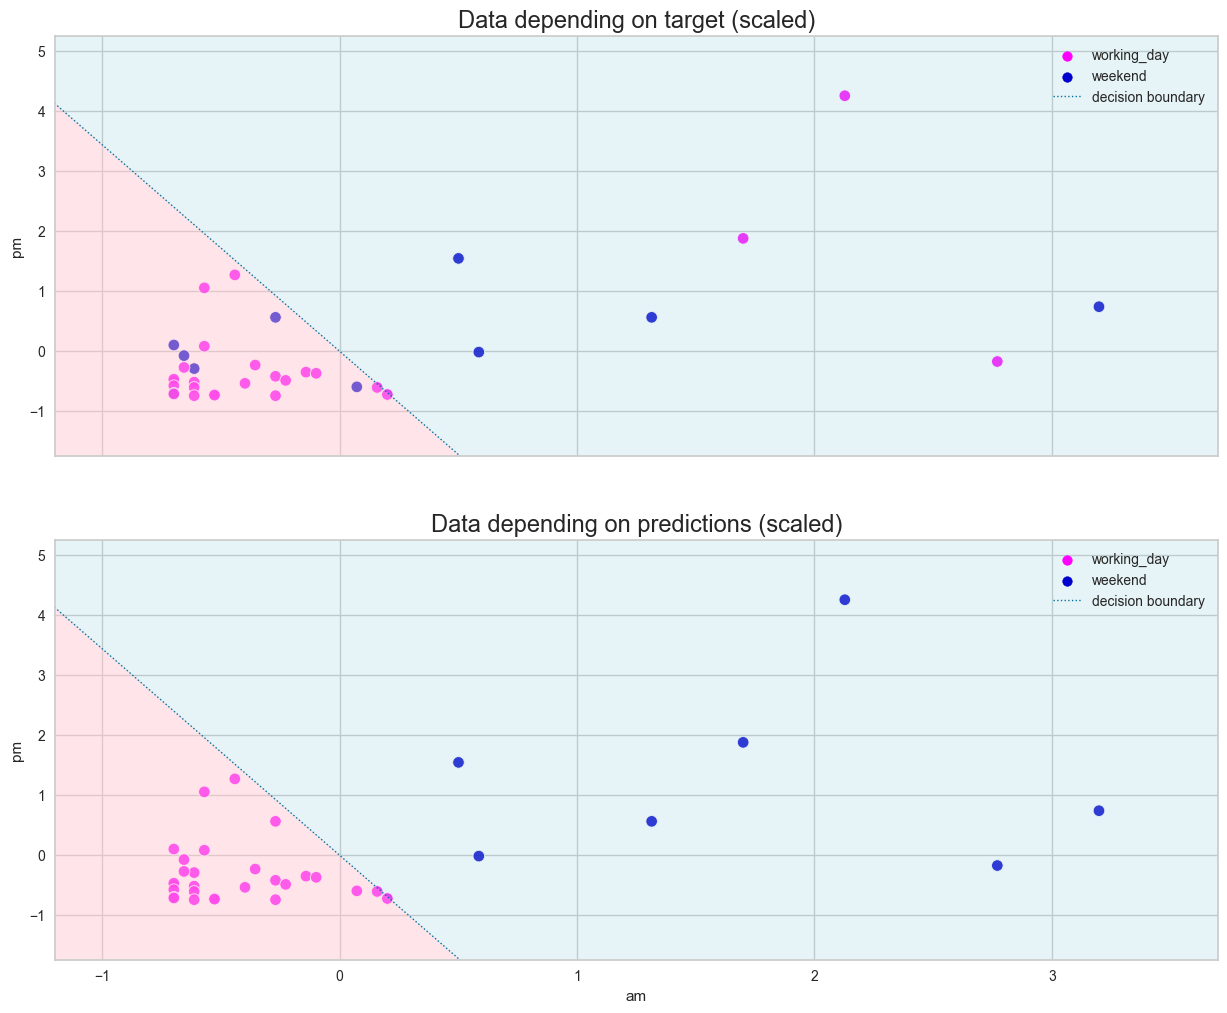

In [101]:
# Drawing a plot #1 (color depends on the target)
fig2, (ax3, ax4) = plt.subplots(2, figsize=(15, 12), sharex=True)

am_pm_plt3 = sns.scatterplot(data=df, ax=ax3,
                             x=X_scaled[:, 0], y=X_scaled[:, 1], hue='target',
                             palette=['magenta', 'mediumblue'], s=70, alpha=0.9)
am_pm_plt3.set_title('Data depending on target (scaled)', fontsize=17)

draw_boundary(ax3, clf_scaled, df)

ax3.set_xlim(X_scaled[:, 0].min() - .5, X_scaled[:, 0].max() + .5)
ax3.set_ylim(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1)


# Drawing a plot #2(color depends on the predictions)
am_pm_plt4 = sns.scatterplot(data=df, ax=ax4,
                             x=X_scaled[:, 0], y=X_scaled[:, 1], hue='predict_scaled',
                             palette=['magenta', 'mediumblue'], s=70, alpha=0.9)
am_pm_plt4.set_title('Data depending on predictions (scaled)', fontsize=17)

draw_boundary(ax4, clf_scaled, df)

ax4.set_xlim(X_scaled[:, 0].min() - .5, X_scaled[:, 0].max() + .5)
ax4.set_ylim(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1)

ax3.set_ylabel('pm')
ax4.set_xlabel('am')
ax4.set_ylabel('pm')



ax3.legend(loc='upper right')
ax4.legend(loc='upper right')

plt.show()

---
## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [102]:
from sklearn.svm import SVC

In [106]:
svc_rbf = SVC(kernel='rbf', probability=True, random_state=21).fit(X_scaled, y)
svc_rbf.score(X_scaled, y)

0.7428571428571429

`Accuracy` of ***SVC*** model with scaled X and ***kernel*** `rbf` is:
> ***0.7428571428571429***

Same as logreg with scaled X

---
### Trying different kernels

In [107]:
svc_linear = SVC(kernel='linear', probability=True, random_state=21).fit(X_scaled, y)
svc_linear.score(X_scaled, y)

0.7142857142857143

Accuracy of SVC model with kernel `linear` is:
> 0.7142857142857143

In [108]:
svc_poly = SVC(kernel='poly', probability=True, random_state=21).fit(X_scaled, y)
svc_poly.score(X_scaled, y)

0.7428571428571429

Accuracy of SVC model with kernel `poly` is:
> 0.7428571428571429

In [109]:
svc_sigmoid = SVC(kernel='sigmoid', probability=True, random_state=21).fit(X_scaled, y)
svc_sigmoid.score(X_scaled, y)

0.6857142857142857

Accuracy of SVC model with kernel `sigmoid` is:
> 0.6857142857142857

In [111]:
df['predict_svc'] = svc_rbf.predict(X_scaled)
df[df['predict_svc'] == 'weekend']

,timestamp,am,pm,target,predict,predict_scaled,predict_svc
16,2020-05-03,47,133,weekend,working_day,weekend,weekend


---
### Drawing a plot

In [59]:
from yellowbrick.contrib.classifier import DecisionViz

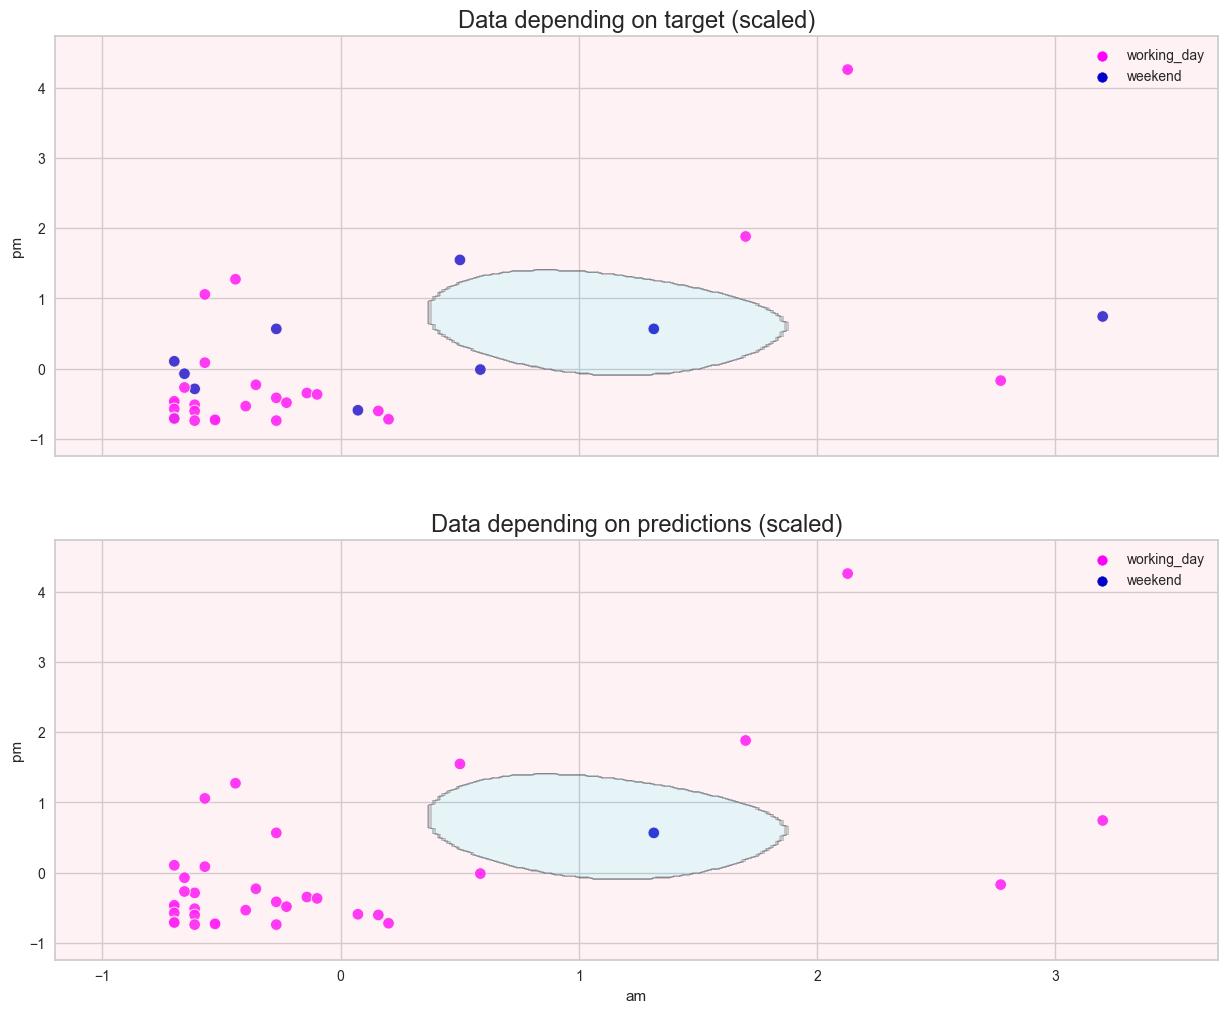

In [147]:
fig3, (ax5, ax6) = plt.subplots(2, figsize=(15, 12), sharex=True)

# Drawing a plot #1 (color depends on the target)
am_pm_plt5 = sns.scatterplot(data=df, ax=ax5,
                             x=X_scaled[:, 0], y=X_scaled[:, 1], hue='target',
                             palette=['magenta', 'mediumblue'], s=70, alpha=0.9)
am_pm_plt5.set_title('Data depending on target (scaled)', fontsize=17)
# -------------------------------------------------------------------------------- #

# Drawing a plot #2(color depends on the predictions)
am_pm_plt6 = sns.scatterplot(data=df, ax=ax6,
                             x=X_scaled[:, 0], y=X_scaled[:, 1], hue='predict_svc',
                             palette=['magenta', 'mediumblue'], s=70, alpha=0.9)
am_pm_plt6.set_title('Data depending on predictions (scaled)', fontsize=17)
# -------------------------------------------------------------------------------- #

# calculations for drawing boundary region
x1_min, x1_max = X_scaled[:, 0].min() - .5, X_scaled[:, 0].max() + .5
x2_min, x2_max = X_scaled[:, 1].min() - .5, X_scaled[:, 1].max() + .5
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = svc_scaled.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
Z = [np.array(list(map(lambda x: x == 'weekend', line))) for line in Z]
# -------------------------------------------------------------------------------- #

# drawing boundary regions
ax5.contourf(xx1, xx2, Z, alpha=0.2, colors=['pink', 'black', 'c', 'black'])
ax6.contourf(xx1, xx2, Z, alpha=0.2, colors=['pink', 'black', 'c', 'black'])
# -------------------------------------------------------------------------------- #

ax5.set_ylabel('pm')
ax6.set_xlabel('am')
ax6.set_ylabel('pm')

ax5.legend(loc='upper right')
ax6.legend(loc='upper right')

plt.show()

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [136]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42).fit(X_scaled, y)
tree.score(X_scaled, y)

0.9428571428571428

`Accuracy` with ***Decision tree*** with scaled X is:
> ***0.9428571428571428***

---
### Trying different values of `max_depth`

In [143]:
tree_3 = DecisionTreeClassifier(max_depth=3, random_state=42).fit(X_scaled, y)
tree_3.score(X_scaled, y)

0.8857142857142857

In [141]:
tree_5 = DecisionTreeClassifier(max_depth=5, random_state=42).fit(X_scaled, y)
tree_5.score(X_scaled, y)

0.9714285714285714

In [142]:
tree_6 = DecisionTreeClassifier(max_depth=6, random_state=42).fit(X_scaled, y)
tree_6.score(X_scaled, y)

1.0

In [148]:
df['predict_tree'] = tree.predict(X_scaled)
df[df['predict_tree'] == 'weekend']

,timestamp,am,pm,target,predict,predict_scaled,predict_svc,predict_tree
1,2020-04-18,1,68,weekend,working_day,working_day,working_day,weekend
8,2020-04-25,30,74,weekend,working_day,weekend,working_day,weekend
9,2020-04-26,28,233,weekend,working_day,weekend,working_day,weekend
15,2020-05-02,91,151,weekend,working_day,weekend,working_day,weekend
16,2020-05-03,47,133,weekend,working_day,weekend,weekend,weekend
22,2020-05-09,0,86,weekend,working_day,working_day,working_day,weekend
23,2020-05-10,10,133,weekend,working_day,working_day,working_day,weekend
29,2020-05-16,0,4,weekend,working_day,working_day,working_day,weekend


---
### Drawing plots

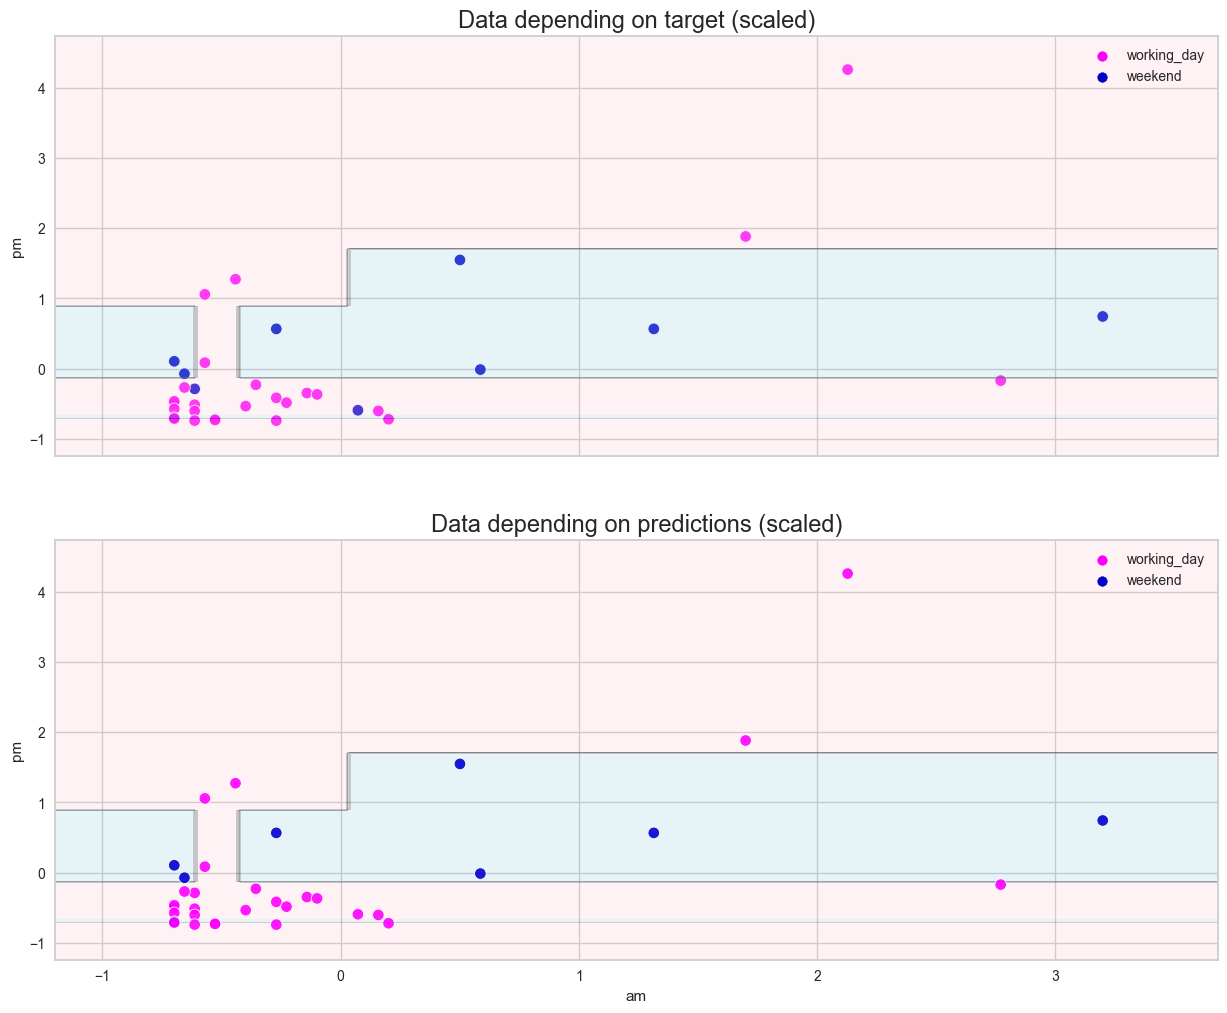

In [149]:
# Drawing a plot #1 (color depends on the target)
fig4, (ax7, ax8) = plt.subplots(2, figsize=(15, 12), sharex=True)

am_pm_plt7 = sns.scatterplot(data=df, ax=ax7,
                             x=X_scaled[:, 0], y=X_scaled[:, 1], hue='target',
                             palette=['magenta', 'mediumblue'], s=70, alpha=0.9)
am_pm_plt7.set_title('Data depending on target (scaled)', fontsize=17)
# -------------------------------------------------------------------------------- #

# Drawing a plot #2(color depends on the predictions)
am_pm_plt8 = sns.scatterplot(data=df, ax=ax8,
                             x=X_scaled[:, 0], y=X_scaled[:, 1], hue='predict_tree',
                             palette=['magenta', 'mediumblue'], s=70, alpha=0.9)
am_pm_plt8.set_title('Data depending on predictions (scaled)', fontsize=17)
# -------------------------------------------------------------------------------- #

# calculations for drawing boundary region
x1_min, x1_max = X_scaled[:, 0].min() - .5, X_scaled[:, 0].max() + .5
x2_min, x2_max = X_scaled[:, 1].min() - .5, X_scaled[:, 1].max() + .5
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = tree.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
Z = [np.array(list(map(lambda x: x == 'weekend', line))) for line in Z]
# -------------------------------------------------------------------------------- #

# drawing boundary regions
ax7.contourf(xx1, xx2, Z, alpha=0.2, colors=['pink', 'black', 'c', 'black'])
ax8.contourf(xx1, xx2, Z, alpha=0.2, colors=['pink', 'black', 'c', 'black'])
# -------------------------------------------------------------------------------- #

ax7.set_ylabel('pm')
ax8.set_xlabel('am')
ax8.set_ylabel('pm')

ax7.legend(loc='upper right')
ax8.legend(loc='upper right')

plt.show()

In [151]:
from sklearn.tree import plot_tree

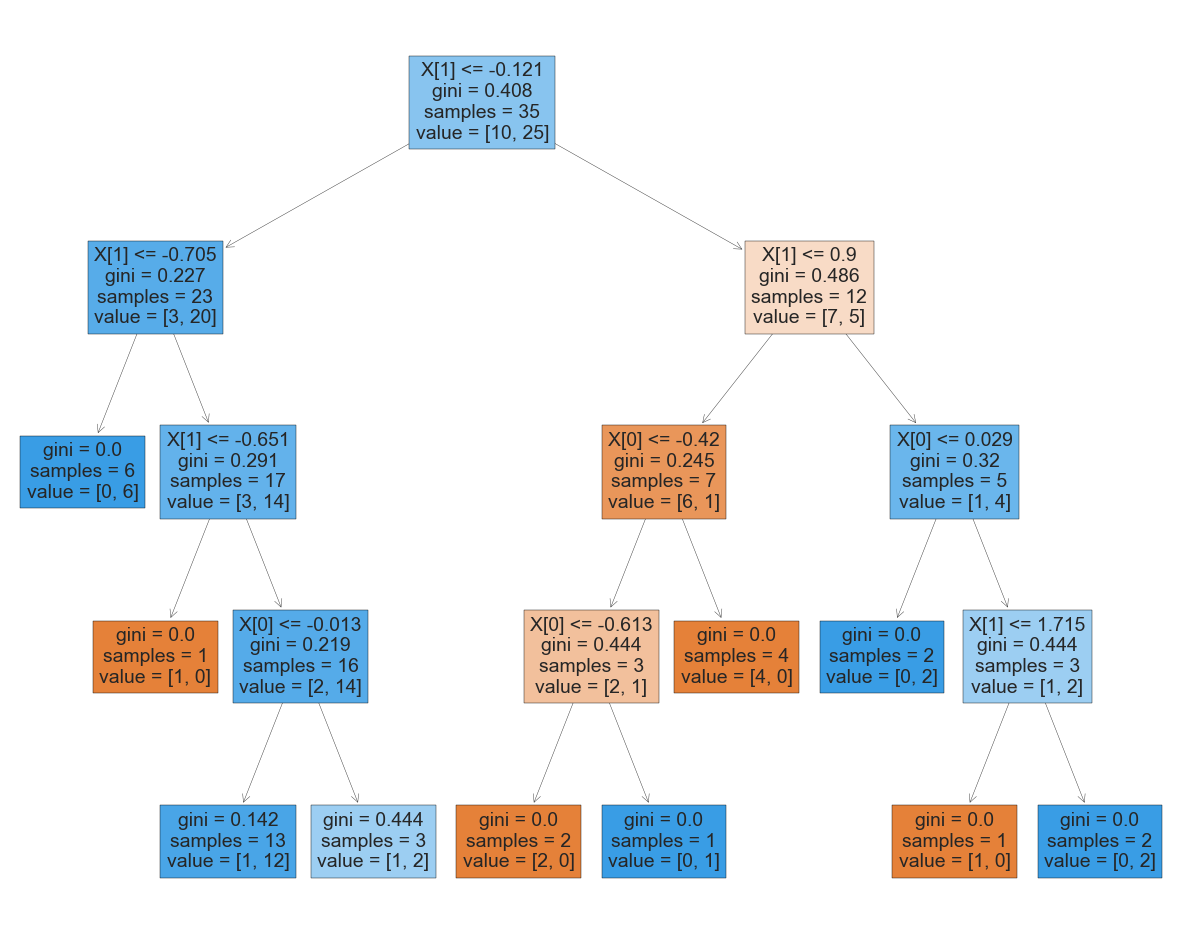

In [172]:
tree_fig, tree_ax = plt.subplots(figsize=(15, 12))

plot_tree(tree, ax=tree_ax, filled=True)

plt.show()

How many leaves in the visualized tree label days as working days?
> ***4 leaves*** (gini = 0.0)